<h1>Project DSCI 100-group-17</h1>
 Minecraft Data Analysis

## Introduction
A research group at ubc is conducting a research on how people play video games. They are provididng free servers to players for this project and record their actions in minecraft world. Allocating servers for players to play minecraft is hard: they must focus their recruitment efforts and ensure that they have sufficient resources (such as server hardware and software licensing) to manage the volume of players they draw in. 

The Computer Science department at UBC has given us 2 files containing data on the players who use their server to play Minecraft.

### Question we are answering

What kind of players are most likely to contribute a large amount of data? 

**Following 2 files are provided to us** 

The first file is **players.csv** containg info on each player.
The columns in this dataset are:

- `experience <fct>` - It's a categorical column indicating the level of player
- `subscribe <lgl>` - Whether user subscribed for promotion emails (`true`) or not (`false`) 
- `hashedEmail <chr>` - A unique Id for each player
- `played_hours <dbl>` - tells how many hours the player has played the game
- `name <chr>` - Game name choosen by each player
- `gender <fct>` - gender of the player
- `age <int>` - age of the player
- `individualId` - ***empty column***
- `organizationName` - ***empty column***

The second file is **sessionss.csv** containg info on each session on the server.
The columns in the **sessions.csv** dataset are:

- `hashedEmail <chr>` - A unique Id for each player
- `start_time <dttm>` - The time when each session has started with date and time
- `end_time <dttm>` - The time when each session has ended with date and time
- `original_start_time <dbl>` - Unix time for the start of the session
- `original_end_time <dbl>` - Unix time for the end of the session

The **Players dataset** have 196 observations, **Sessions Dataset** have 1535 observations


**Datasets we are using**

We are using both data sets to make a regression model to predict played_hours. 

The explanotary variables we will be using are :

- `age <int>` - age of the player

 **We will be converting experience into numerical value to make it work as an exploratory variable**
 
- `experience <dbl>` - It will be a quantitative variable describing the experience of a player

 **We will be using sessions.csv file to get the number of sessions each user played and then we will merge both datasets and will get rid of unwanted variable**
 
- `number_of_sessions <int>` - This variable will tell us how many sessions each player logged in.

## Methods and Results

### Methods

**Loading**

-

**Wrangling**

-

**Visualization**

-

**Modeling**

- 
- filtered data to remove observations for 5> age >80. it is done beacause there are very very high chances that people above 80 and below 5 are not playing this game.
- distributed `merged_final` dataset into 75% training and 25% testing data for each of above variable
- Tuned 2 **k-nearest neighbours** regression models to find best k to for these models in order to predict played_hours using `age` and `experience`.
- Created **linear regression** model for predicting played_hours based on `number_of_sessions` because visualization tells there is a positive relation between number of sessions and played hours
- Collected rmse data for all the models
- Pulled best k value for K-nearest neighbours regression models.
- Developed k-nearest neighbours models using best k obtained by collecting metrics and getting the value of k for lowest mean.
- to determine the best k we get the observation with lowest **RMSE** , lowest RMSE means this k lowest prediction error based on training data `played_hours`
- Tested our models using testing data and then pulled metrics to get **RMSPE**, RMSPE tells the prediction error on testing data.
  
**Visualizing Analysis**
  
- Created plots of training data with blue line showing the predicted values on training data using the models that we created
-


In [1]:
library(dplyr)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(repr)
library(readr)
library(rvest)
library(ggplot2)
library(hms)
library(lubridate)
set.seed(1234)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yards

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url) #load in the two datasets

players_data_df <- as.data.frame(players_data) #convert to a dataframe in order to wrangle
# players_data_df

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
session_data <- read_csv(url)

session_data_df <- as.data.frame(session_data) 
# session_data_df

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#joining both datasets by hashedemail

merged_df <- left_join(players_data_df, session_data_df, by = "hashedEmail")|>
select(-individualId, -organizationName, -original_start_time, - original_end_time, -start_time, -end_time) |> 
filter(played_hours > 0)


sessions_number <- merged_df |>
group_by(name) |>
  summarise(number_of_sessions = n()) 

merged_df <- merged_df |>
  left_join(sessions_number, by = "name")

merged_df <- merged_df |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5))

merged_exp <- merged_df |>
  distinct(name, .keep_all=TRUE)

#remove columns from dataset we dont need anymore. 
#hashed email and name are unique for each 
#indidivudal so we dont need both present, 
#and we dont need the old experience column

merged_final <- merged_exp |>
    select(-experience, -hashedEmail)

# merged_final

List of 1
 $ legend.position: chr "none"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


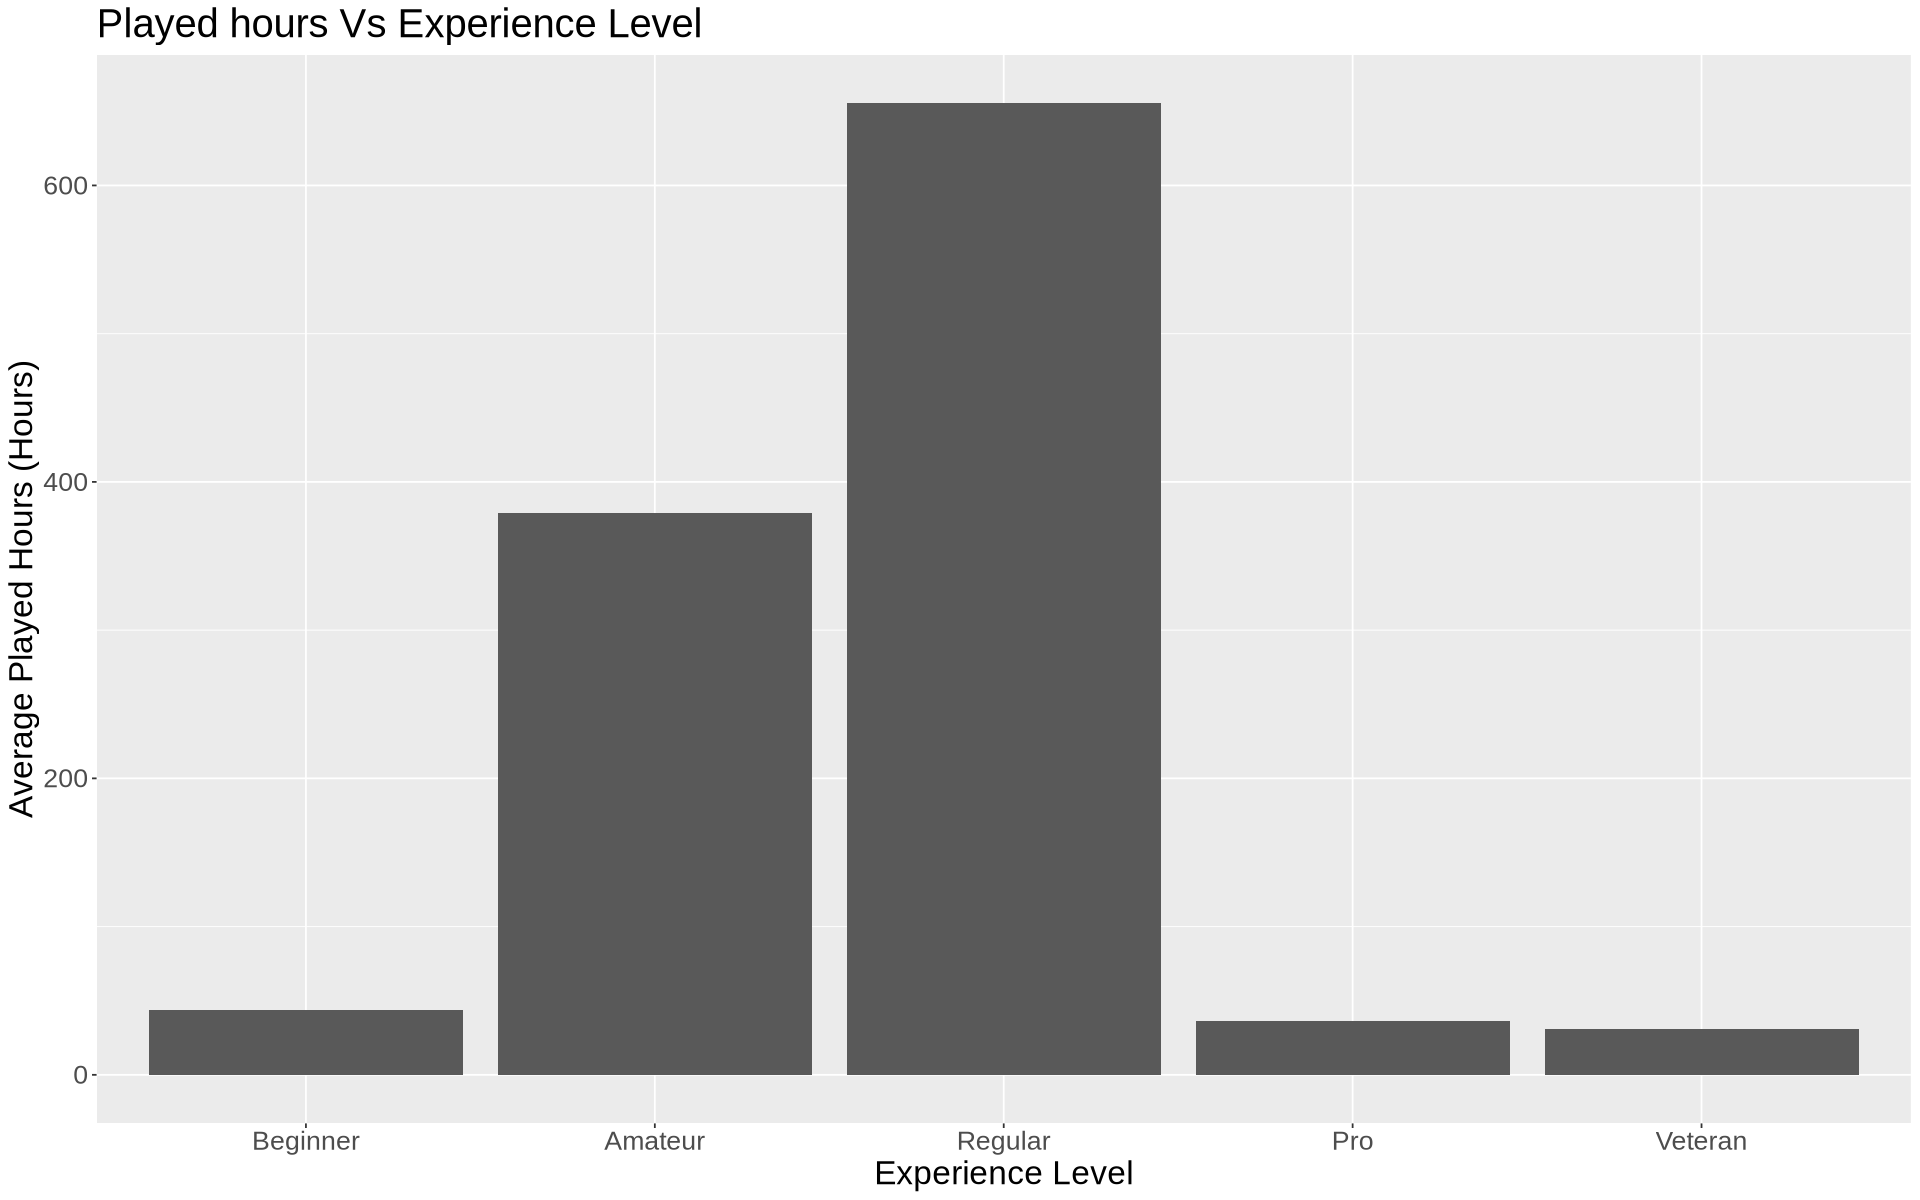

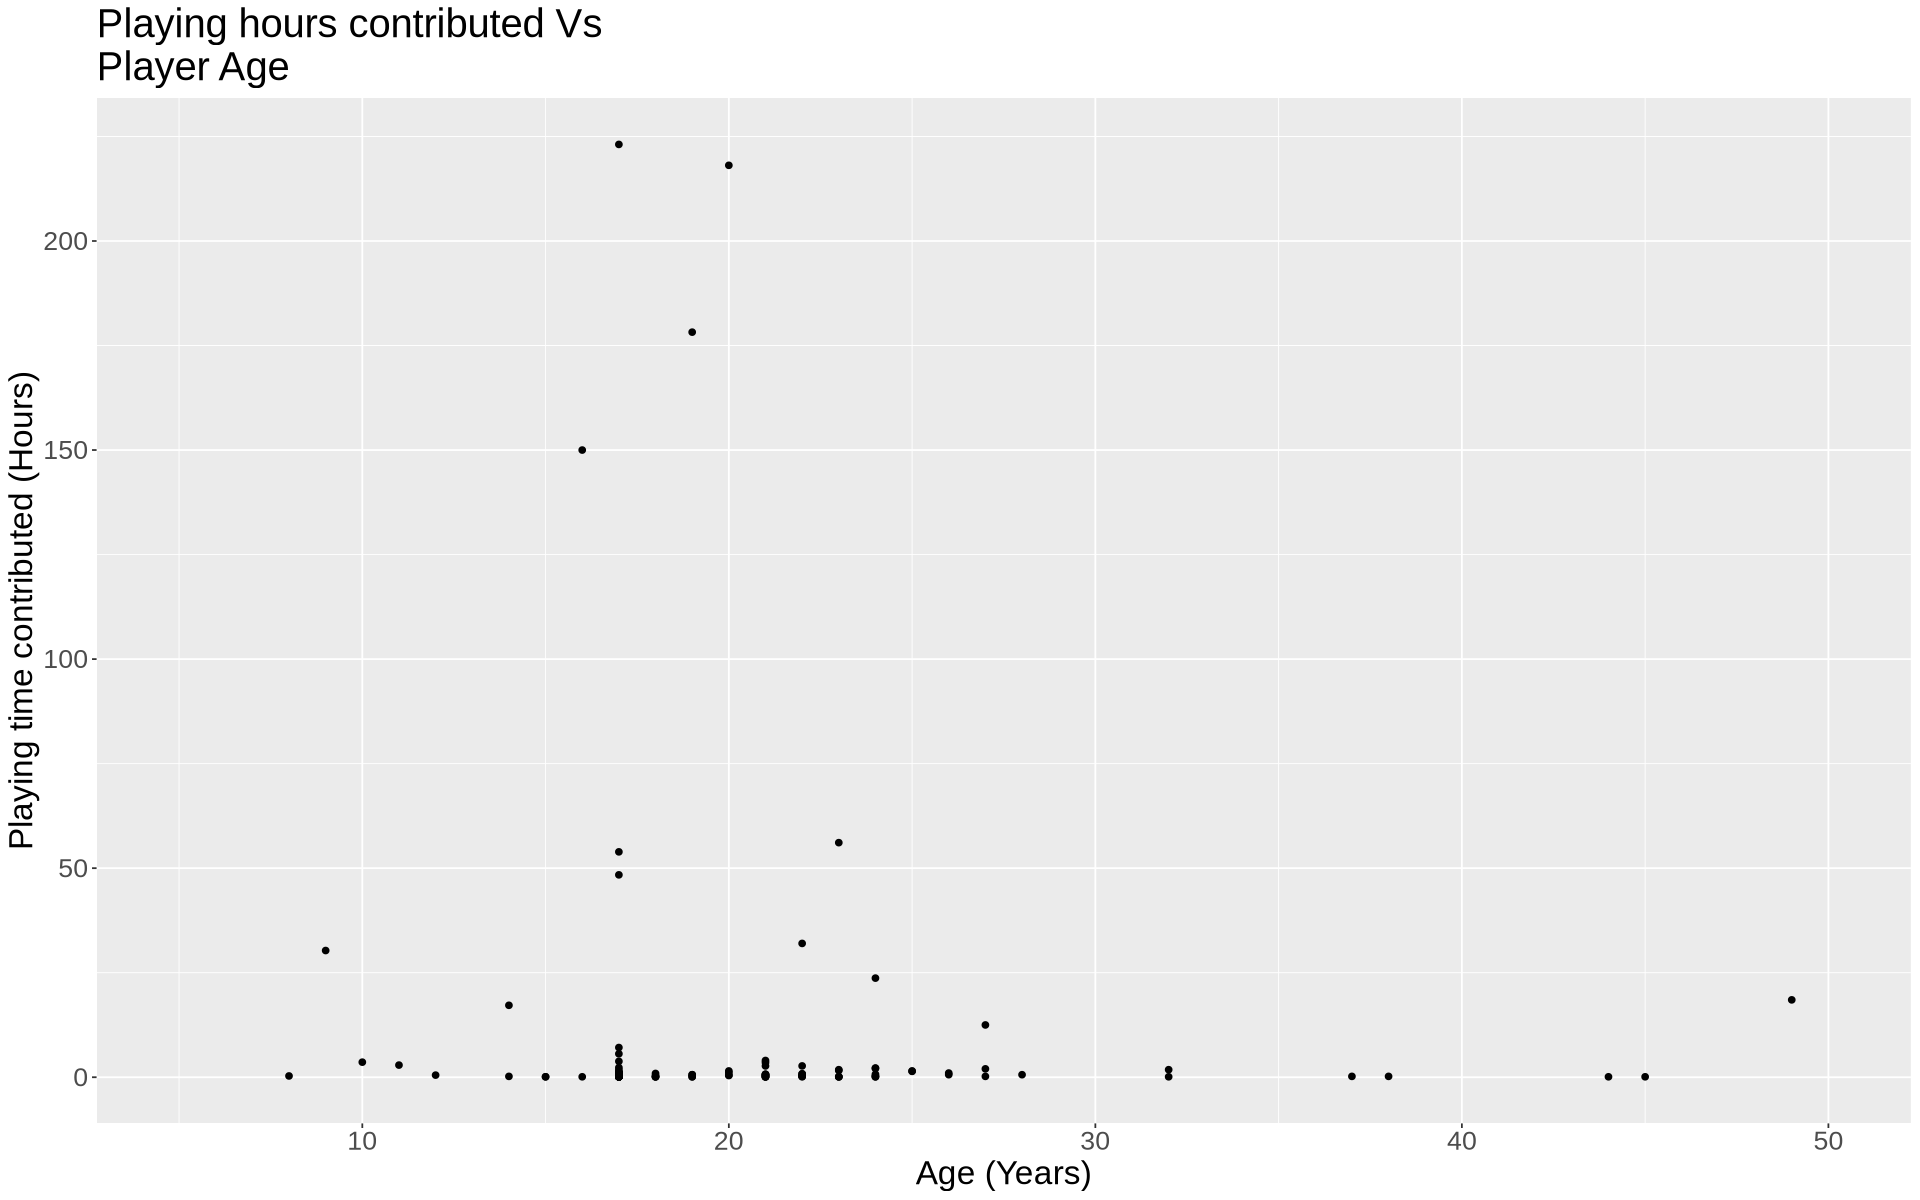

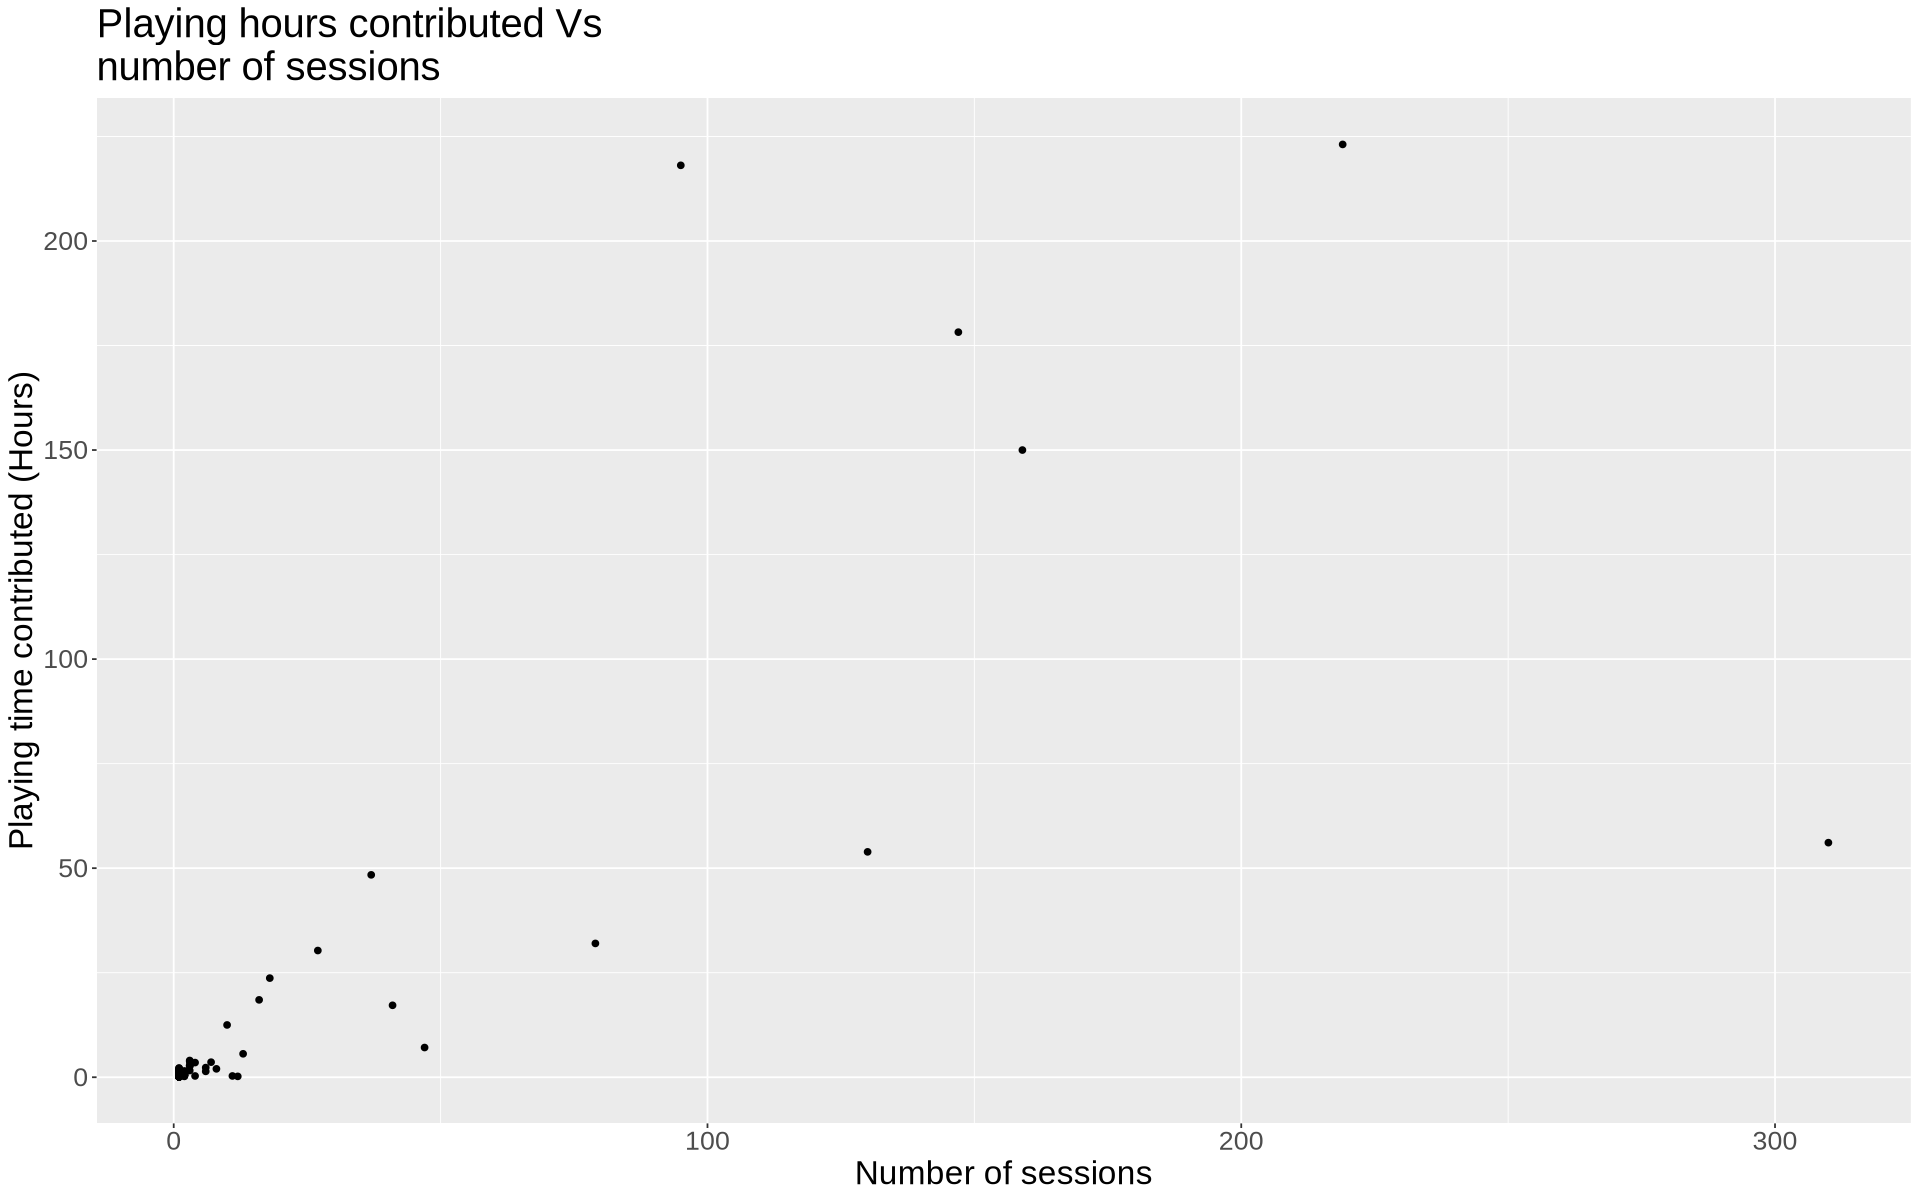

In [4]:
options(repr.plot.width = 16, repr.plot.height = 10) 

# Bar plot to visualize average played hours by experience level
ggplot(merged_final, aes(x = as.factor(experience_numeric), y = played_hours)) +
  geom_bar(stat = "identity") +
  labs(title = "Played hours Vs Experience Level",
       x = "Experience Level",
       y = "Average Played Hours (Hours)") +
      scale_x_discrete(labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
    theme(text = element_text(size = 20))
    theme(legend.position = "none")

 #avg age by hours      
avg_played_hours_by_age <- merged_final |>
  group_by(age) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))

# Bar plot: Played Hours by Age
ggplot(merged_final, aes(x = age, y = played_hours)) +
  # geom_bar(stat = "identity") +
  geom_point() +
  labs(x = "Age (Years)",
    y = "Playing time contributed (Hours)",
    title = "Playing hours contributed Vs\nPlayer Age") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none") +
    xlim(5,50)

# Bar plot: Played Hours by Sessions
ggplot(merged_final, aes(x = number_of_sessions, y = played_hours)) +
  geom_point() +
  labs(x = "Number of sessions",
    y = "Playing time contributed (Hours)",
    title = "Playing hours contributed Vs\nnumber of sessions") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none")

options(repr.plot.width = 16, repr.plot.height = 10) 

  

In [5]:
merged_final <- ungroup(merged_final)

merged_final_no_outliers <- merged_final |>
                            filter(age < 80, age > 5)
# merged_final_no_outliers
merged_final_age_split <- initial_split(merged_final_no_outliers, prop = .75, strata = age)
hours_age_training <- training(merged_final_age_split)
hours_age_testing <- testing(merged_final_age_split)



hours_experience_split <- initial_split(merged_final, prop = .75, strata = experience_numeric)
hours_experience_training <- training(hours_experience_split)
hours_experience_testing <- testing(hours_experience_split)



hours_sessions_split <- initial_split(merged_final, prop = .75, strata = number_of_sessions)
hours_sessions_training <- training(hours_sessions_split)
hours_sessions_testing <- testing(hours_sessions_split)

In [6]:


gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

# Tuning the model for predicting played_hours from age to find best k
hours_age_vfold <- vfold_cv(hours_age_training,v = 5, strata = age)

hours_age_recipe <- recipe(played_hours ~ age, data = hours_age_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_age_workflow <- workflow() |>
                    add_recipe(hours_age_recipe) |>
                    add_model(tune_spec)

hours_age_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_age_vfold, grid = gridvals) |>
                    collect_metrics()

hours_age_min <- hours_age_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_age_min

→ A | warning: 59 samples were requested but there were 62 rows in the data. 57 will be used.

There were issues with some computations   A: x1

→ B | warning: 59 samples were requested but there were 63 rows in the data. 58 will be used.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
36,rmse,standard,24.93945,5,8.524338,Preprocessor1_Model36


In [7]:

# Tuning the model for predicting played_hours from experience to find best k

hours_experience_vfold <- vfold_cv(hours_experience_training,v = 5, strata = age)

gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

hours_experience_recipe <- recipe(played_hours ~ experience_numeric, data = hours_experience_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_experience_workflow <- workflow() |>
                    add_recipe(hours_experience_recipe) |>
                    add_model(tune_spec)

hours_experience_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_experience_vfold, grid = gridvals) |>
                    collect_metrics()

hours_experience_min <- hours_experience_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_experience_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,rmse,standard,21.72976,5,7.462952,Preprocessor1_Model16


In [8]:
# Tuning the model for predicting played_hours from number_of_sessions to find best k

hours_session_vfold <- vfold_cv(hours_sessions_training, v = 5, strata = number_of_sessions)

tune_spec_2 <- linear_reg() |> 
      set_engine("lm") |>
      set_mode("regression")

hours_sessions_recipe <- recipe(played_hours ~ number_of_sessions, data = hours_sessions_training) |>
                        step_scale(number_of_sessions) |>
                        step_center(number_of_sessions)

hours_sessions_workflow <- workflow() |>
                        add_recipe(hours_sessions_recipe) |>
                        add_model(tune_spec_2)

hours_sessions_result <- hours_sessions_workflow |>
                        tune_grid(resamples = hours_session_vfold, grid = gridvals) |>
                        collect_metrics()

hours_sessions_min <- hours_sessions_result |>
                        filter(.metric == "rmse") |>
                        slice_min(mean,n =1)
hours_sessions_min

Warning message:
“No tuning parameters have been detected, performance will be evaluated using the resamples with no tuning. Did you want to [tune()] parameters?”


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
rmse,standard,11.81599,5,3.692336,Preprocessor1_Model1


In [9]:
k_min_age <- hours_age_min |>
         pull(neighbors)

hours_age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_age) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_age_best_fit <- workflow() |>
         add_recipe(hours_age_recipe) |>
         add_model(hours_age_best_spec) |>
         fit(data = hours_age_training)

hours_age_summary <- hours_age_best_fit |>
          predict(hours_age_testing) |>
          bind_cols(hours_age_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_age_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,51.63431201
rsq,standard,0.01200203
mae,standard,20.76724138


In [10]:
k_min_experience <- hours_experience_min |>
         pull(neighbors)

hours_experience_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_experience) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_experience_best_fit <- workflow() |>
         add_recipe(hours_experience_recipe) |>
         add_model(hours_experience_best_spec) |>
         fit(data = hours_experience_training)

hours_experience_summary <- hours_experience_best_fit |>
          predict(hours_experience_testing) |>
          bind_cols(hours_experience_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_experience_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,56.19875791
rsq,standard,0.05990576
mae,standard,23.86681034


In [11]:
# k_min_sessions <- hours_sessions_min |> pull(neighbors)

hours_sessions_best_spec <- linear_reg() |>
                            set_engine("lm") |>
                            set_mode("regression")

hours_sessions_best_fit <- workflow() |>
                            add_recipe(hours_sessions_recipe) |>
                            add_model(hours_sessions_best_spec) |>
                            fit(hours_sessions_training)

hours_sessions_fit_summary <- hours_sessions_best_fit |>
                                predict(hours_sessions_testing) |>
                                bind_cols(hours_sessions_testing) |>
                                metrics(truth = played_hours, estimate = .pred)
hours_sessions_fit_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,49.1830884
rsq,standard,0.3489381
mae,standard,14.4530478


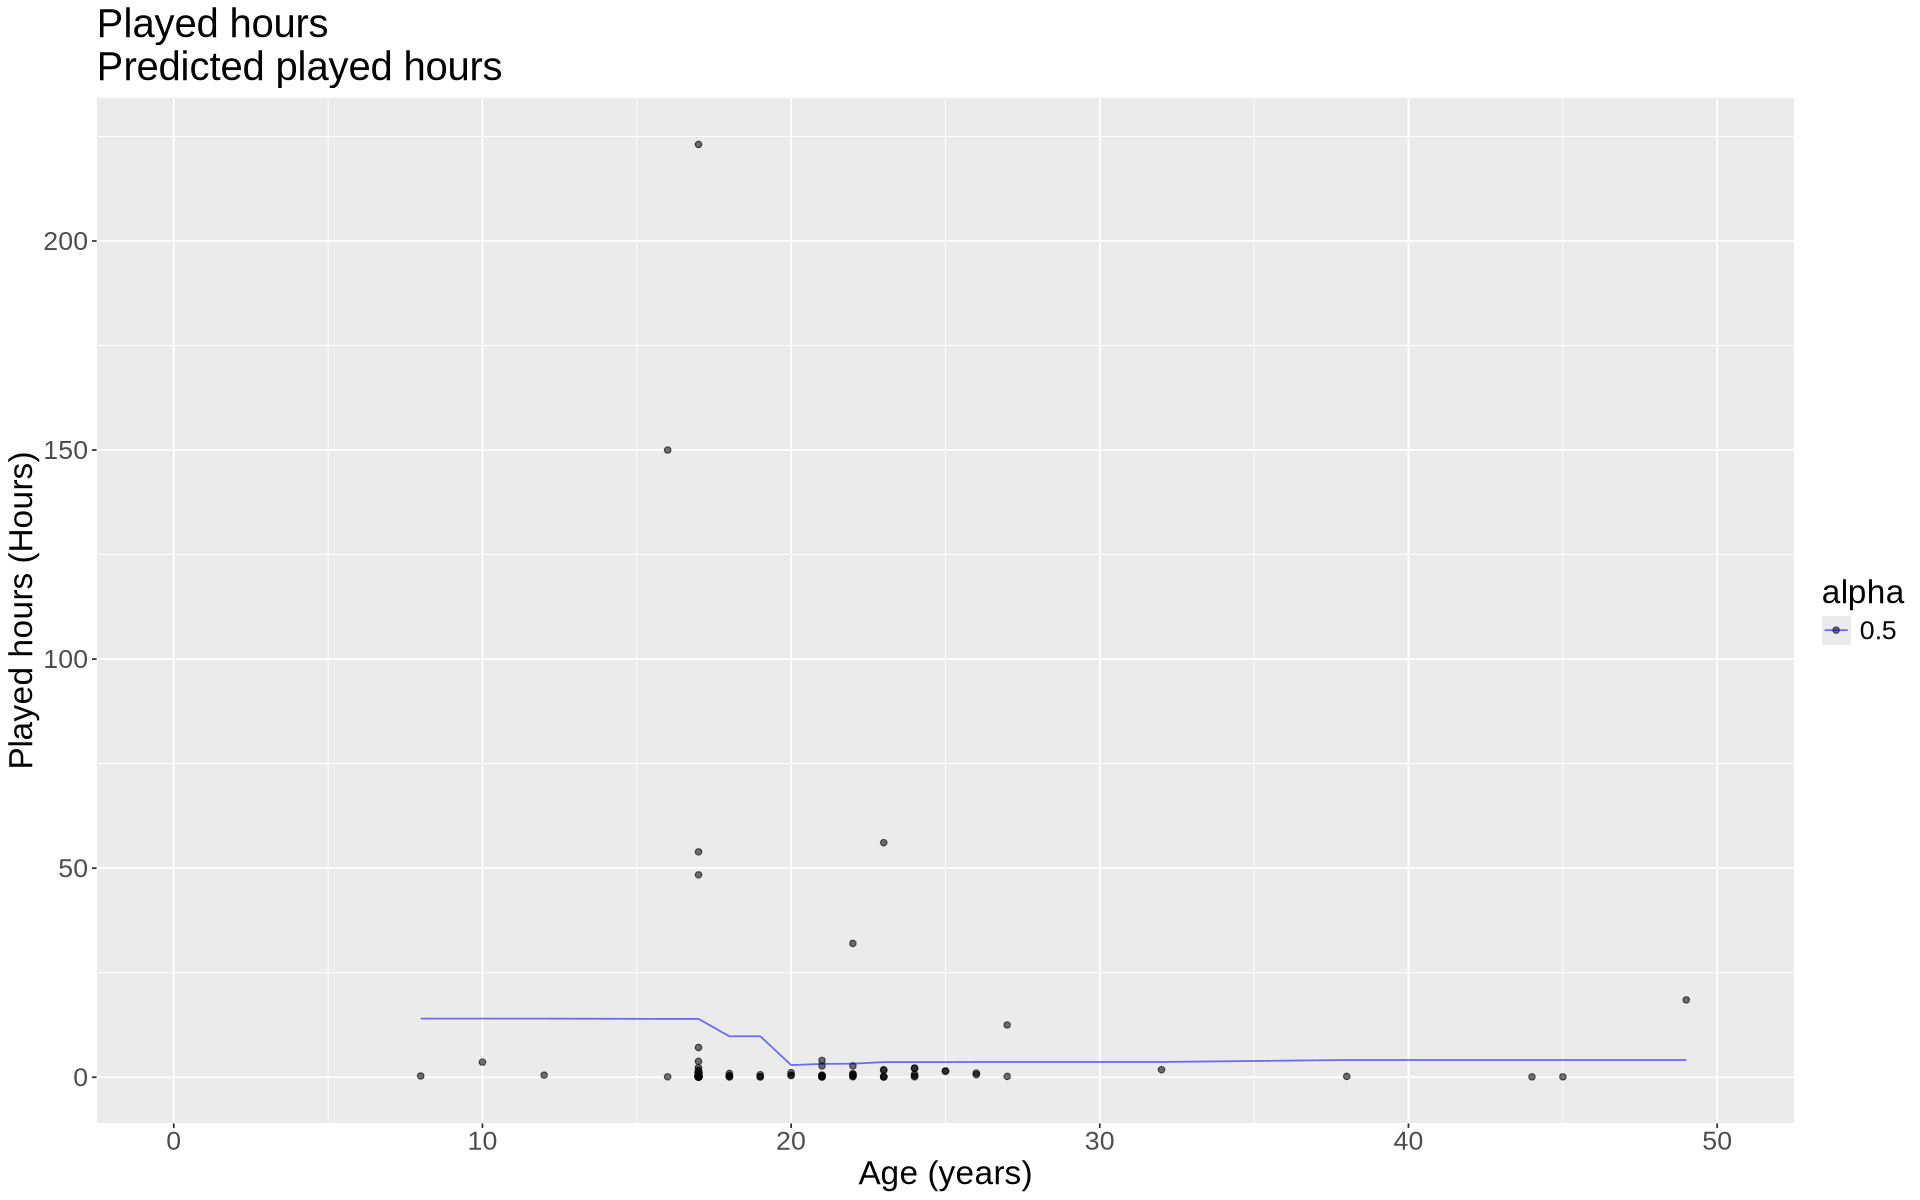

In [16]:

hours_age_predicted_data <- hours_age_best_fit |>
          predict(hours_age_training) |>
          bind_cols(hours_age_training)


hours_age_plot <- hours_age_predicted_data |> 
                    ggplot(aes(x = age, y = played_hours, alpha = 0.5)) +
                    # geom_bar(stat = "identity") +
                    geom_point()+
                    geom_line(data = hours_age_predicted_data,aes(x = age, y = .pred), color = "blue") +
                    xlim(c(0, 50))+
                    labs( x = "Age (years)", y = "Played hours (Hours)",
                         title = "Played hours\nPredicted played hours") +
                    theme(text = element_text(size = 20))

  
hours_age_plot

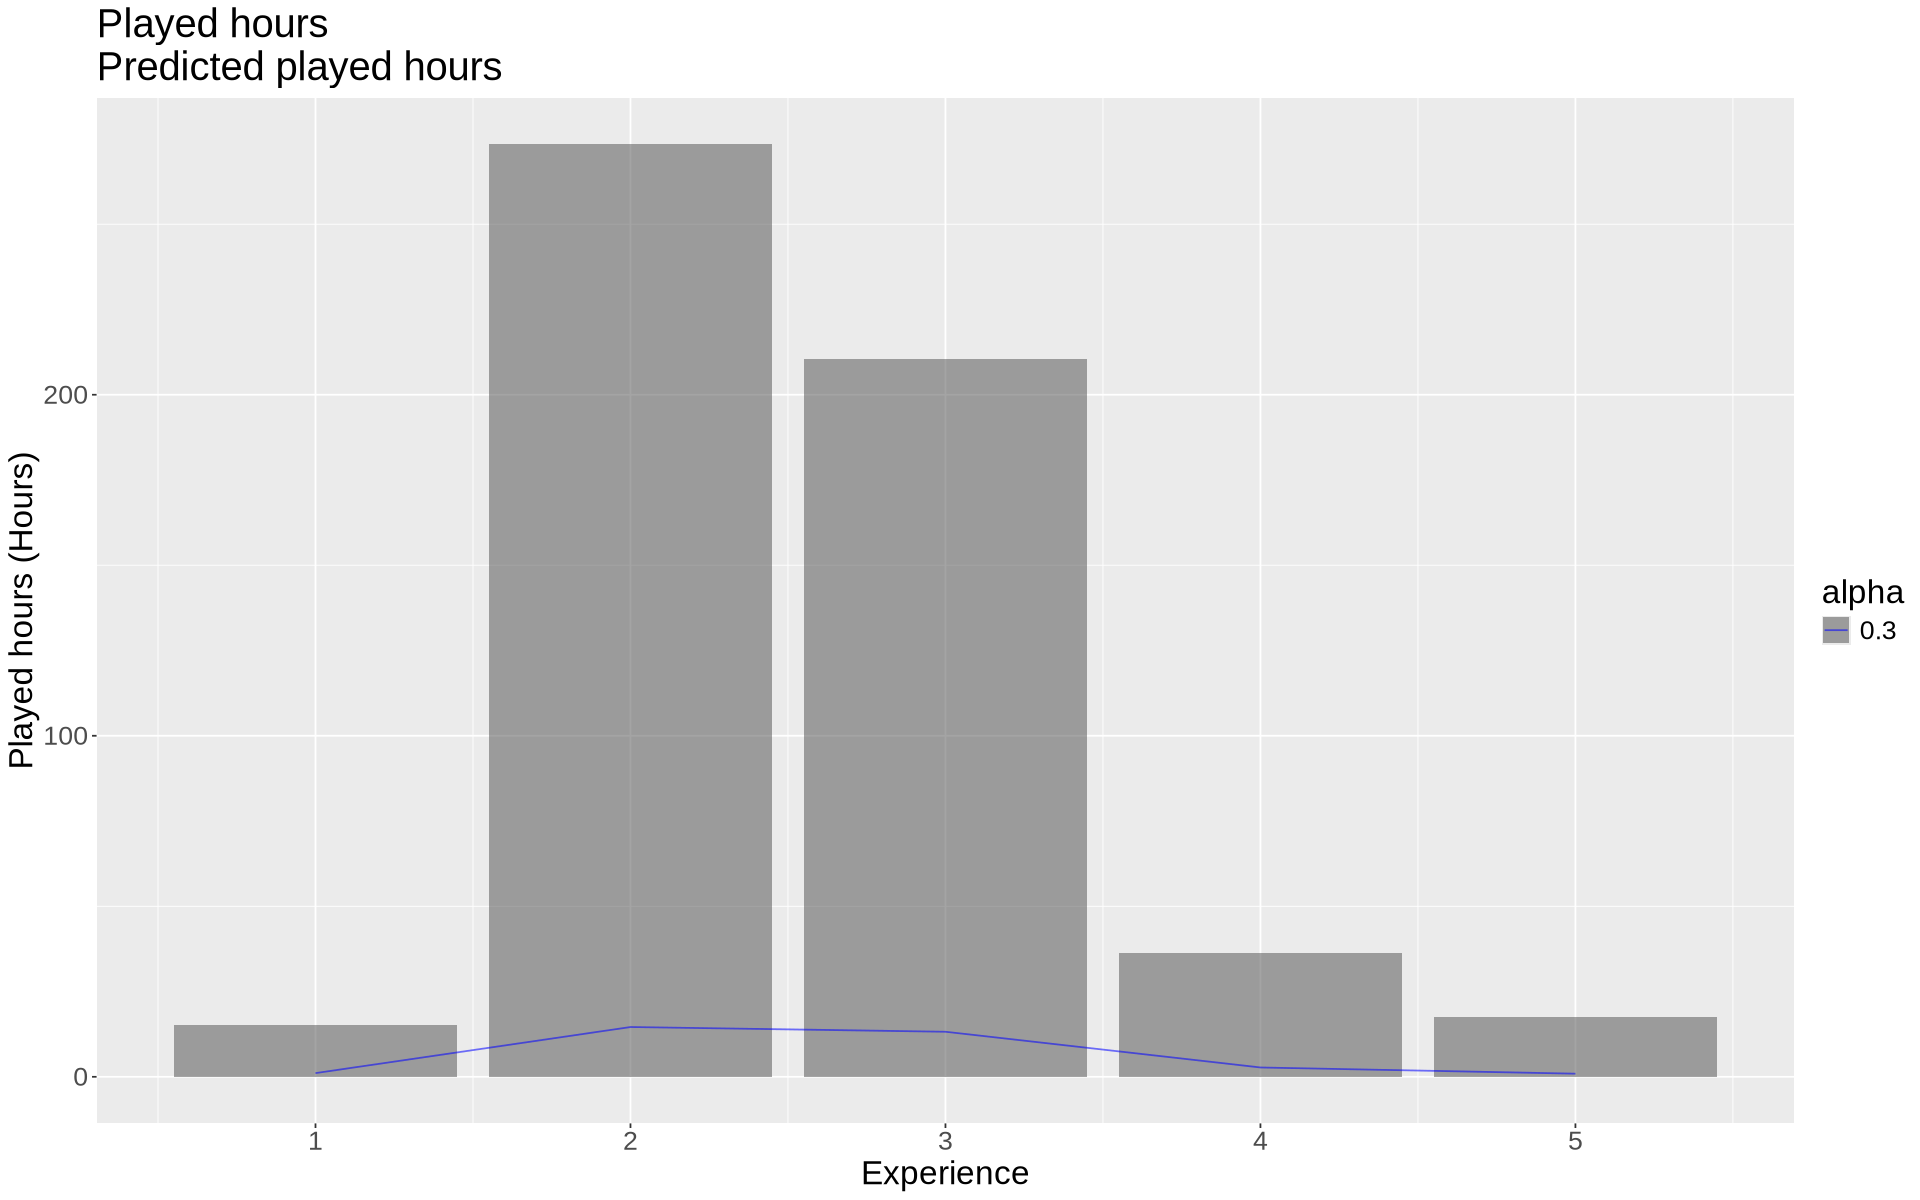

In [17]:
hours_experience_predicted_data <- hours_experience_best_fit |>
          predict(hours_experience_training) |>
          bind_cols(hours_experience_training)


hours_age_plot <- hours_experience_predicted_data |> 
                    ggplot(aes(x = experience_numeric, y = played_hours, alpha = 0.3)) +
                    geom_bar(stat = "identity") + 
                    labs( x = "Experience", y = "Played hours (Hours)",
                         title = "Played hours\nPredicted played hours", fill = "Experience")+
                    geom_line(data = hours_experience_predicted_data, aes(x = experience_numeric, y = .pred), color = "blue")+
                    theme(text = element_text(size = 20))

  
hours_age_plot

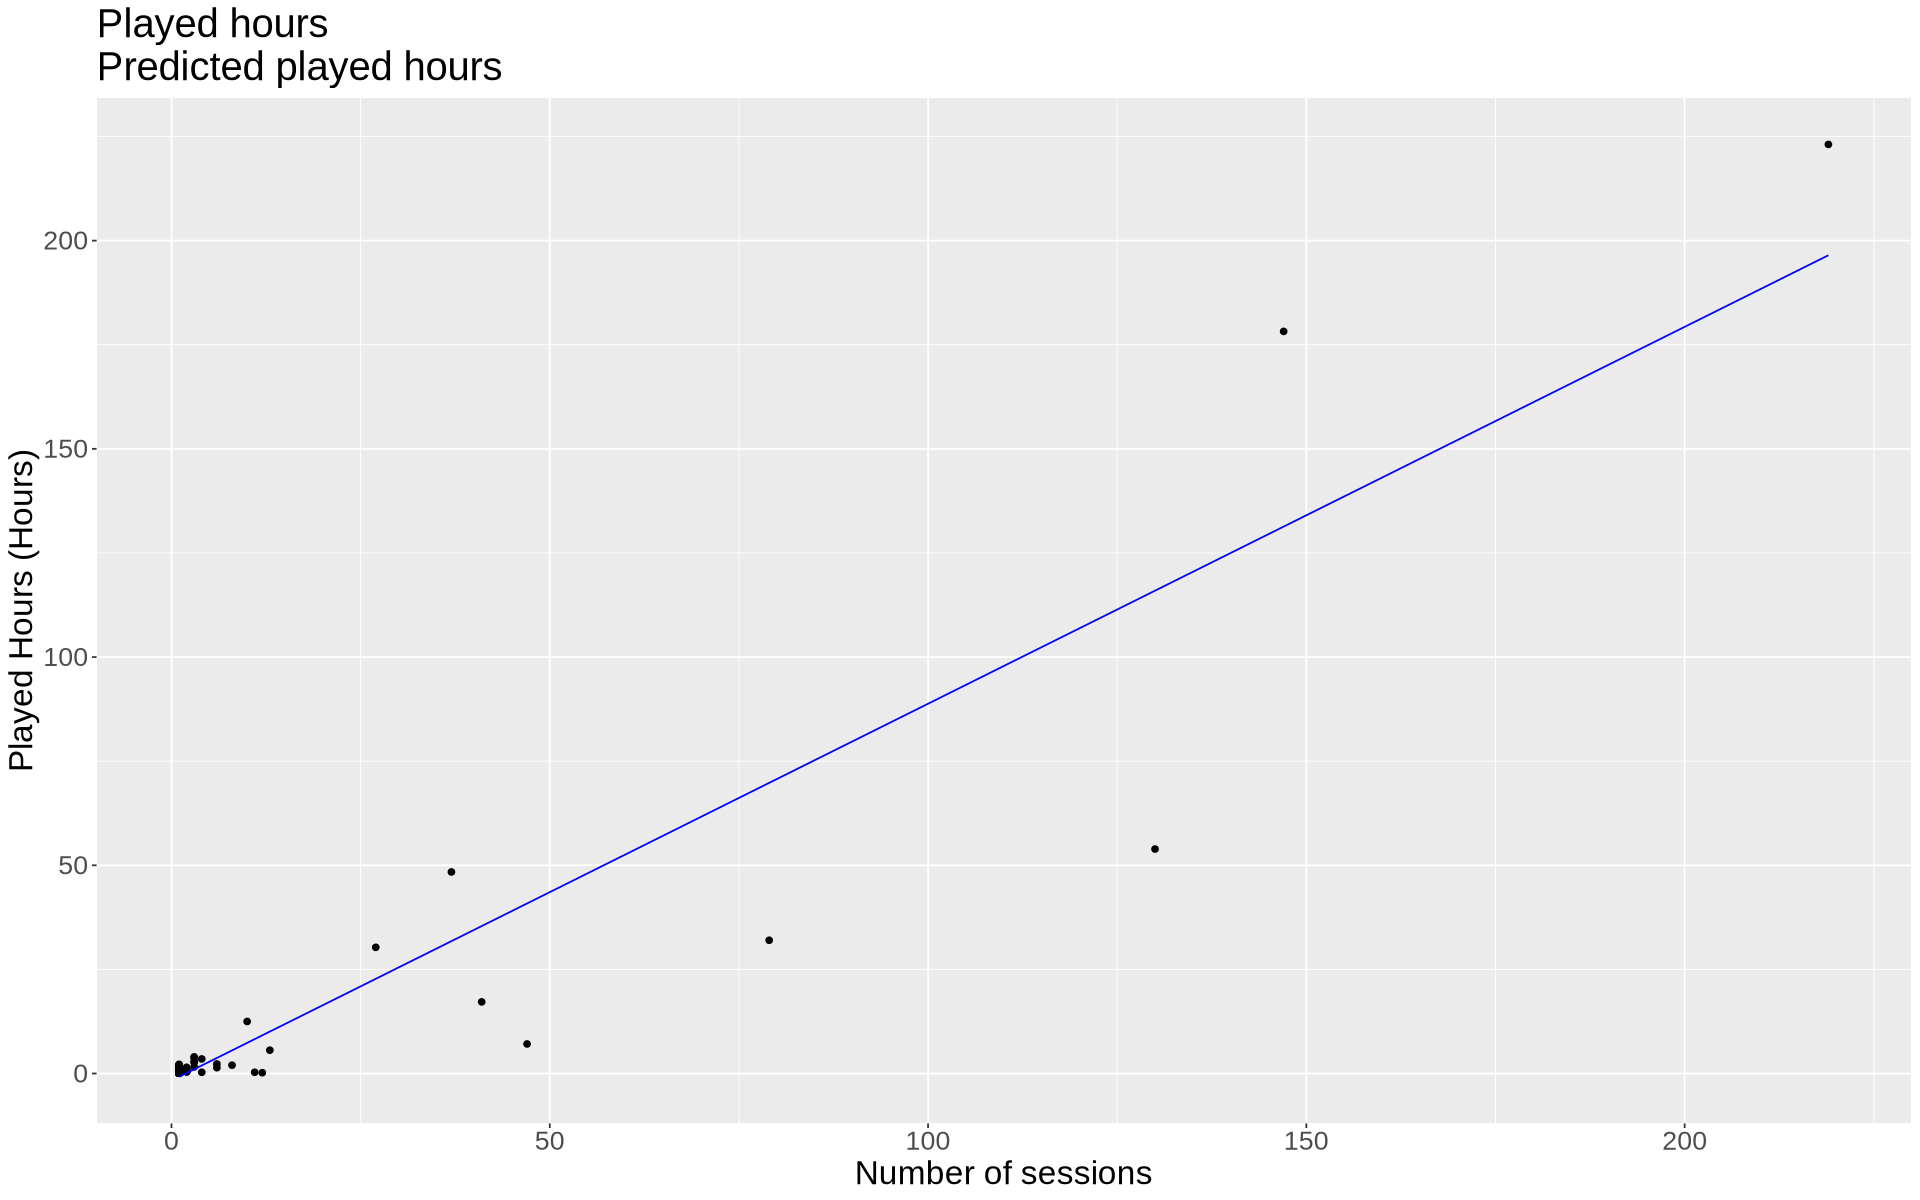

In [18]:
hours_sessions_predicted_data <- hours_sessions_best_fit |>
          predict(hours_sessions_training) |>
          bind_cols(hours_sessions_training)


hours_sessions_plot <- hours_sessions_predicted_data |> 
                    ggplot(aes(x = number_of_sessions, y = played_hours)) +
                    geom_point() +  
                    geom_line(data = hours_sessions_predicted_data, aes(x = number_of_sessions, y = .pred), color = "blue") +
                    labs( x = "Number of sessions", y = "Played Hours (Hours)", title= "Played hours\nPredicted played hours") +
                    theme(text = element_text(size = 20))
  
hours_sessions_plot